# **📈📍 PIB | Analyse inter-processus**
---

🔰 Le PIB est un marqueur universel pour comparer la richesse des pays entre eux. 

Crises économiques, explosions, ou encore crise sanitaire dernièrement... sont des facteurs principaux d'évolution.

L'objectif de ce TP est d'apporter une analyse inter-processus dans un premier temps (analyse des PIBs entre différents pays), ainsi que dans un second temps une analyse intra-processus (analyse des données sur un même pays).

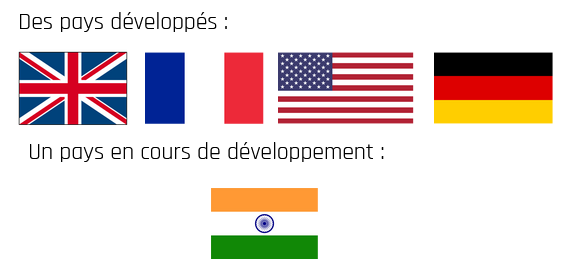

---
🔰 Pour commencer, et dans un soucis de praticité, nous allons réaliser l'ensemble de l'importation des librairies nécessaires au besoin de notre projet : 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import gauss
import pandas as pd
import seaborn as sns

---
###  **1️⃣ Récupération des données**

🔰 Pour analyser l'ensemble des données, nous allons commencer par récupérer ces dernières.

L'ensembles des données proviennent de l'OECD via le lien suivant : 

```
https://data.oecd.org/fr/gdp/pib-trimestriel.htm
```

Sur ces sources de données sur le PIB, nous pouvons distinguer deux types de données :     

```
"Pourcentage de variation" : évolution de la variation du PIB pour chaque pays
"Indice de volume" : permet de comparer le volume des PIB de chaque pays
```

Sur cette première analyse, nous allons utiliser les données dans leurs évolution (pourcentage de variation). 

Pour l'analyse intra-processus, nous allons utiliser la deuxième selection de données, représentant les indices de volumes. 

In [ ]:
!wget = http://caullireau.com/data731/data_evolution.csv
!wget = http://caullireau.com/data731/data_volume.csv

---
###  **2️⃣ Affichage des tendances**

🔰 Pour dessiner l'ensemble des tendances en fonction de la source de donnée, nous utilisons la fonction display_tendance().

In [ ]:
def display_tendance(data, name):
  plt.figure(figsize=(35,15))

  # Méthode de concatenation ZIP : https://www.programiz.com/python-programming/methods/built-in/zip
  for country in countries:
    plt.plot(data[country]["TIME"], data[country]["Value"], label=country)

  plt.title("Tendances pour l'ensemble des pays pour la tendence en fonction du/de la " + str(name))
  plt.xlabel('Periode de date (Trimestre)',fontsize = 25)
  plt.xticks(rotation=90)
  plt.ylabel('PIB', fontsize = 25)

  plt.grid()
  plt.legend()

  plt.show()

#### **2️⃣.1️⃣ Affichage des tendances - En fonction de la variation**

🔰 Nous allons commencer avec l'analyse du premier jeu de données pour les données représentant l'évolution de la variation du PIB.

In [ ]:
data = pd.read_csv("data_evolution.csv")
countries = list(set(data['LOCATION']))
data_countries = {}

for country in countries:
  data_country = data.loc[data['LOCATION']==country,:].copy()
  data_country.is_copy = False
  variance = data_country.rolling(4,min_periods=2).std()
  data_country['Variance'] = variance

  data_countries[country] = data_country

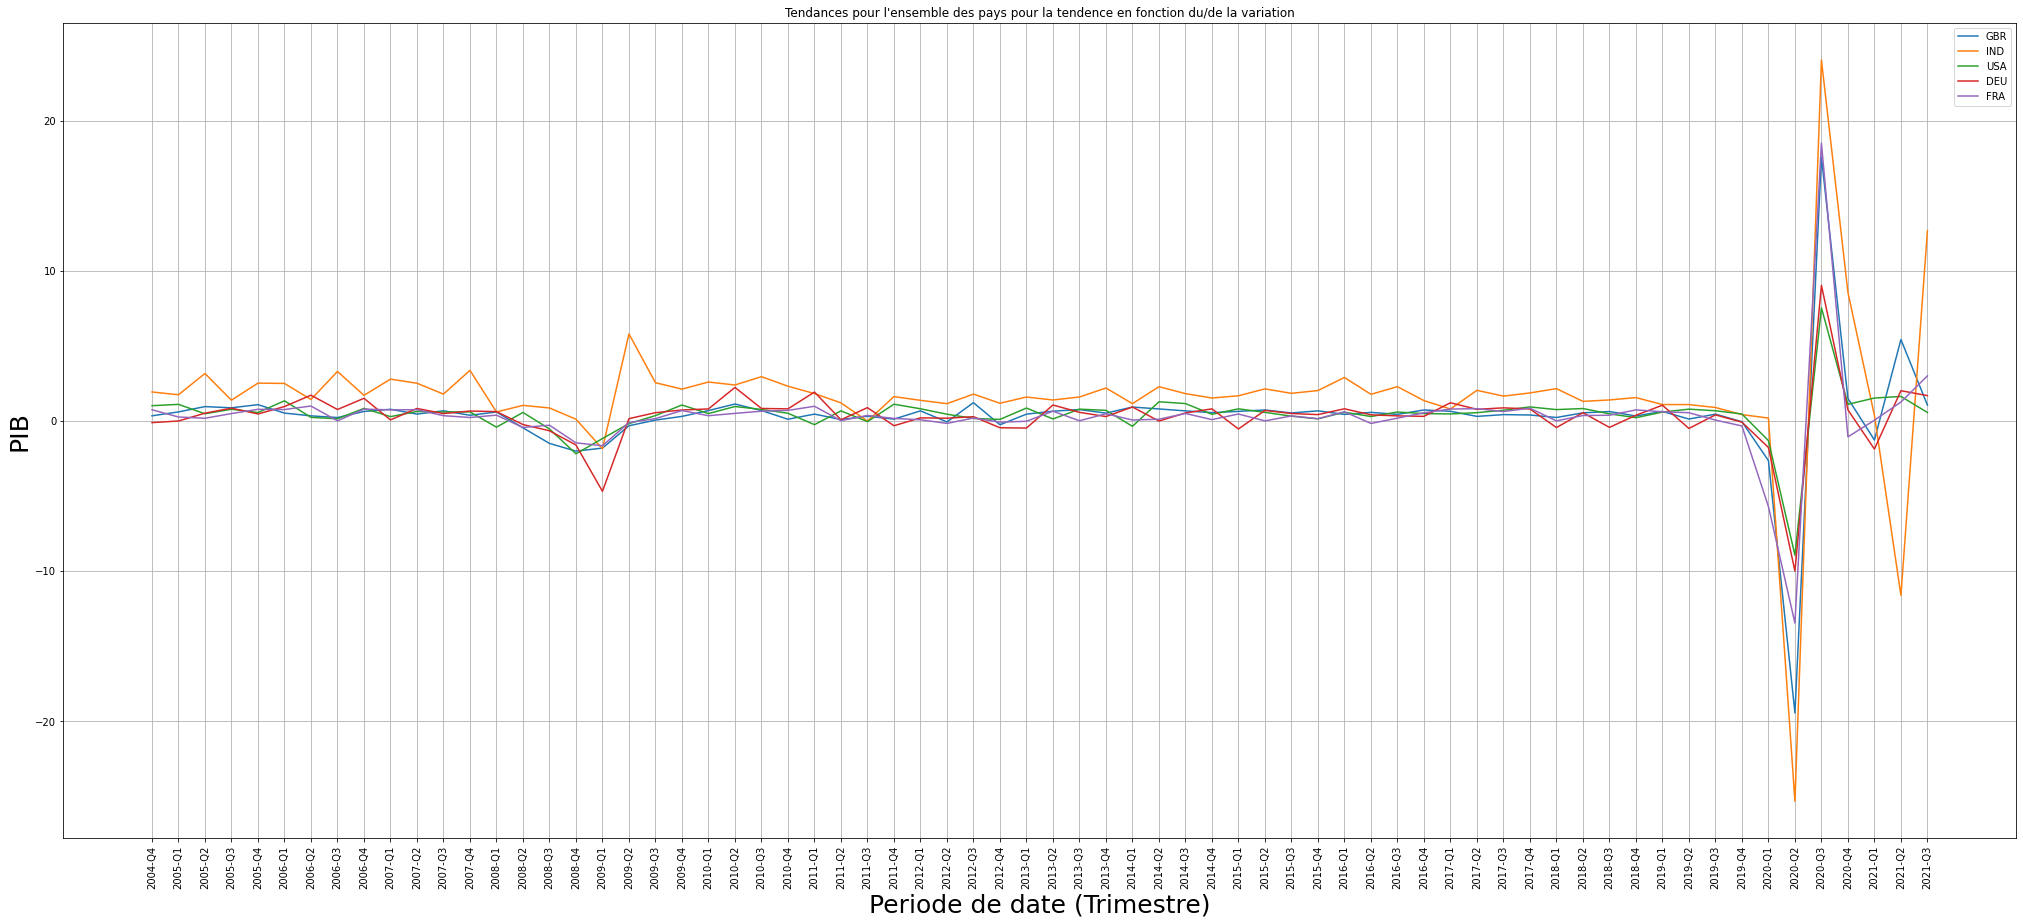

In [ ]:
display_tendance(data_countries, "variation")

🔰 Nous pouvons voir un comportement en deux temps :     

```
~2008 : crise économique mondiale 
~2020/2021 : crise modiale du COVID-19
```



---
###  **3️⃣ Affichage des tendances - En fonction du volume**

🔰 Nous allons maintenant faire la même analyse avec les données en fonction du volume. 

Nous avions dans un premeir temps la variation des données, nous allons maintenant voir l'évolution du volume de chaque PIB.

In [ ]:
!wget = http://caullireau.com/data731/data_volume.csv
data = pd.read_csv("data_volume.csv")
data_volume = {}

for country in countries:
  data_country = data.loc[data['LOCATION']==country,:].copy()
  data_country.is_copy = False
  variance = data_country.rolling(4,min_periods=2).std()
  data_country['Variance'] = variance

  data_volume[country] = data_country

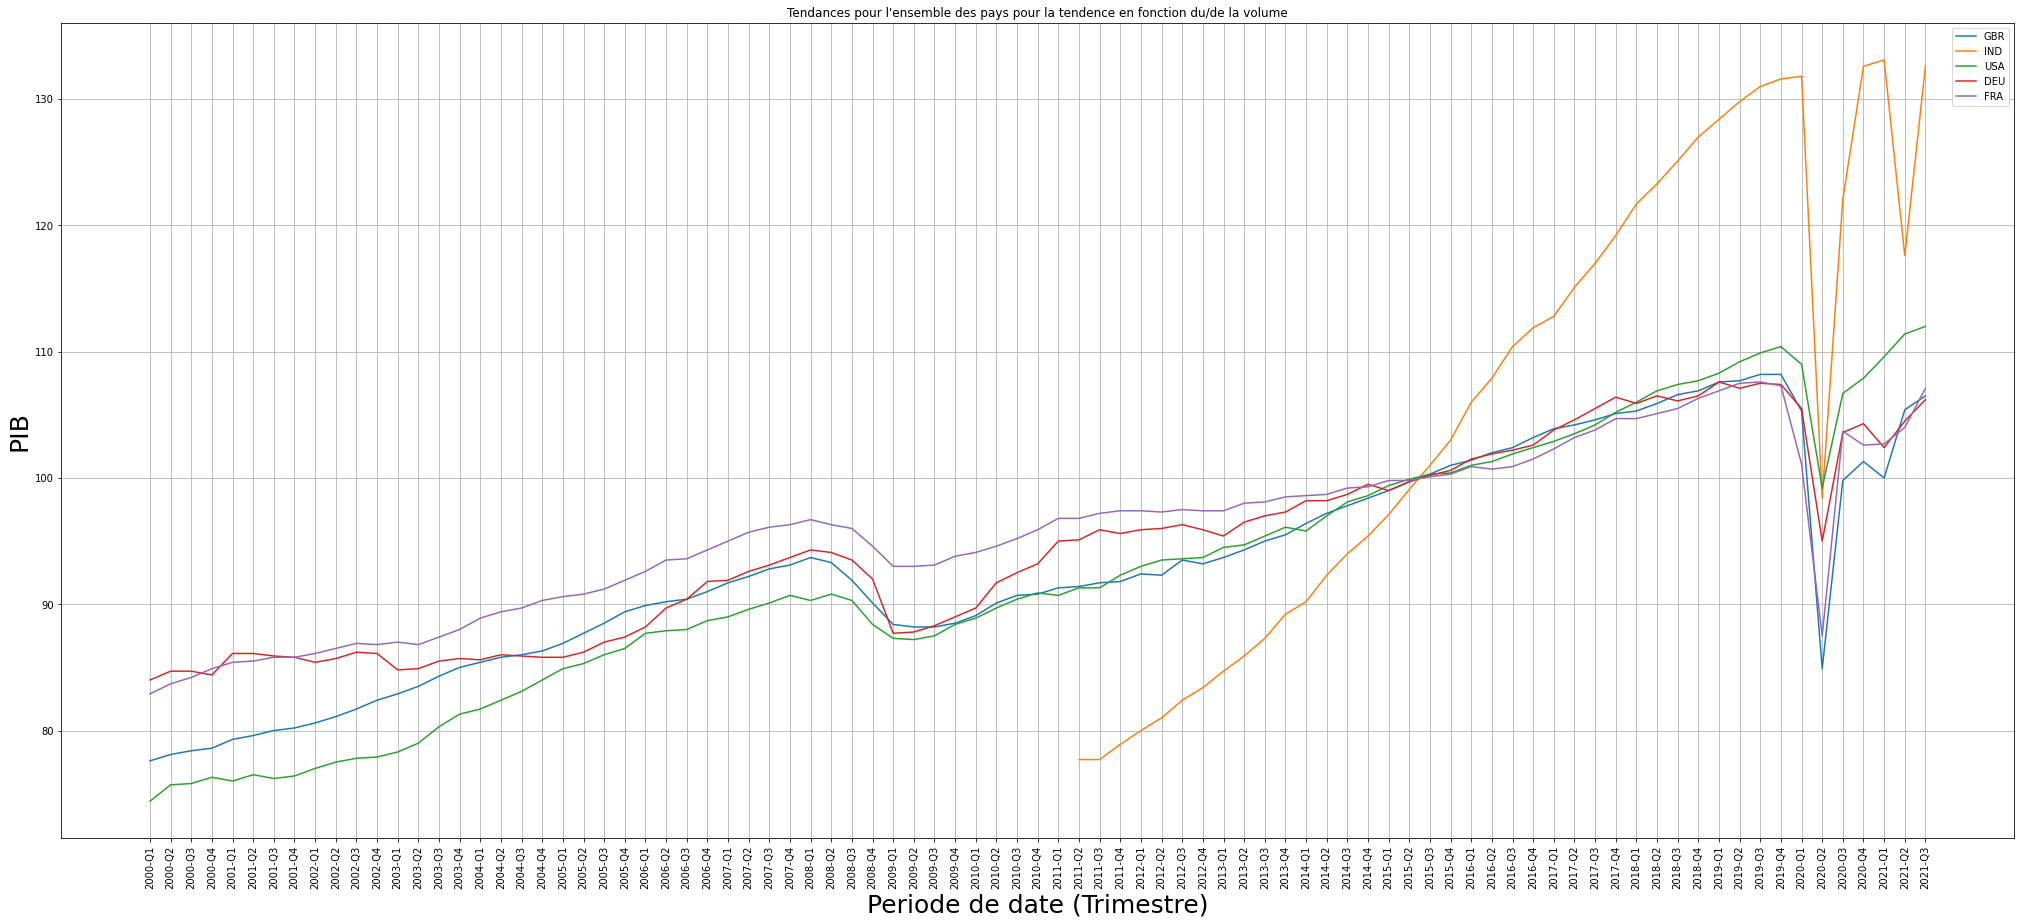

In [ ]:
display_tendance(data_volume, "volume")

🔰 Nous pouvons voir globalement une évolution continue en terme d'augmentation, avec une forte variation pour les periodes précédement explicité. 

Le cas de l'Inde est très intéressant, ce pays en développement à de forte variation de PIB et prendre de pleine face l'ensemble des crises mondiale (très grosse variation)

---
###  **2️⃣ Analyse avec une matrice de correlation**

🔰 Nous allons maintenant, à l'aide d'une matrice de correlation, essayer de déterminer les comportements entre les pays qui sont les plus proches.

In [ ]:
# Panda DataFrame : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

correlation = {}
for country in countries:
    correlation[country] = data_countries[country]["Value"].values

mat_corr = pd.DataFrame(data = correlation).corr()

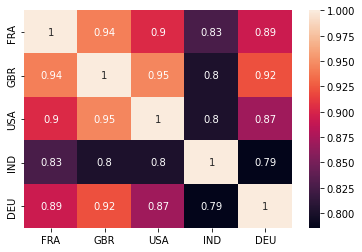

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

sns.heatmap(mat_corr, annot=True)

🔰 Grâce à la heatmap, nous pouvons voir que certains pays sont beaucoup plus en corrélation que d'autres. 

Le cas de l'Inde ressort une nouvelle fois, en effet c'est le pays qui à le moins de corrélation avec les autres pays, du aux variations importantes de son PIB. 

🔰 Nous allons maintenant, et ce pour chaque couple de pays, nous allons tracer un histograme 3D.

In [ ]:
country_couples = []
for c1 in countries:
  for c2 in countries:
    if c1 != c2 and (c2, c1) not in country_couples:
      country_couples.append((c1,c2))

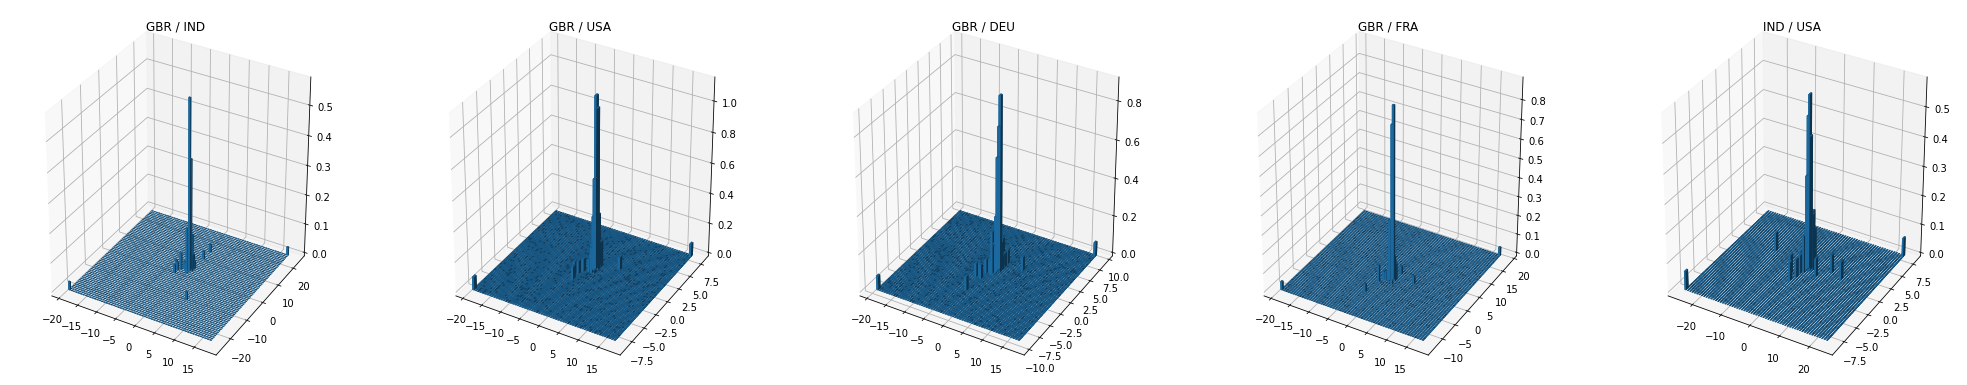

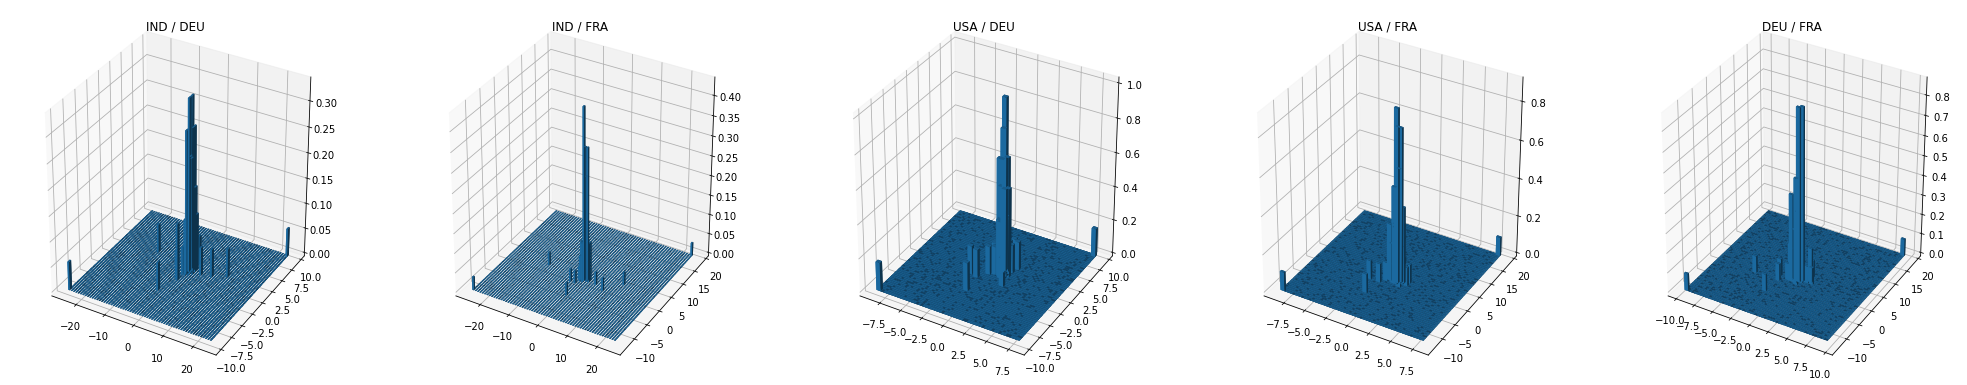

In [ ]:
nbElementPerLine = 5
nbElementPerColumn = math.ceil(len(country_couples)/nbElementPerLine)

for i in range(len(country_couples)):
    if (i%nbElementPerLine==0): plt.figure(figsize=(35,15))

    couple = country_couples[i]
    M1 = data_countries[couple[0]]["Value"]
    M2 = data_countries[couple[1]]["Value"]

    # Generate hist
    hist, xedges, yedges = np.histogram2d(M1, M2, bins=60,density=True)

    # update position
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    # display in subplot
    ax = plt.subplot(nbElementPerColumn,nbElementPerLine,i+1,projection='3d')
    ax.set_title(couple[0] + " / " + couple[1])

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    if (i%nbElementPerLine==nbElementPerLine-1): plt.show();

🔰 Nous pouvons confirmer notre idée sur la faible corrélation de l'Inde avec les autres pays.

Sur l'ensemble des histrograme 3D, nous pouvons voir des valeurs aux extrémités, qui montre le maximum de chaque variation. 

---
###  **3️⃣ Analyse des variations globales**

🔰 Pour comprendre les pics de variation, nous allons faire une étude de variation globale sur l'ensemble de la periode. 

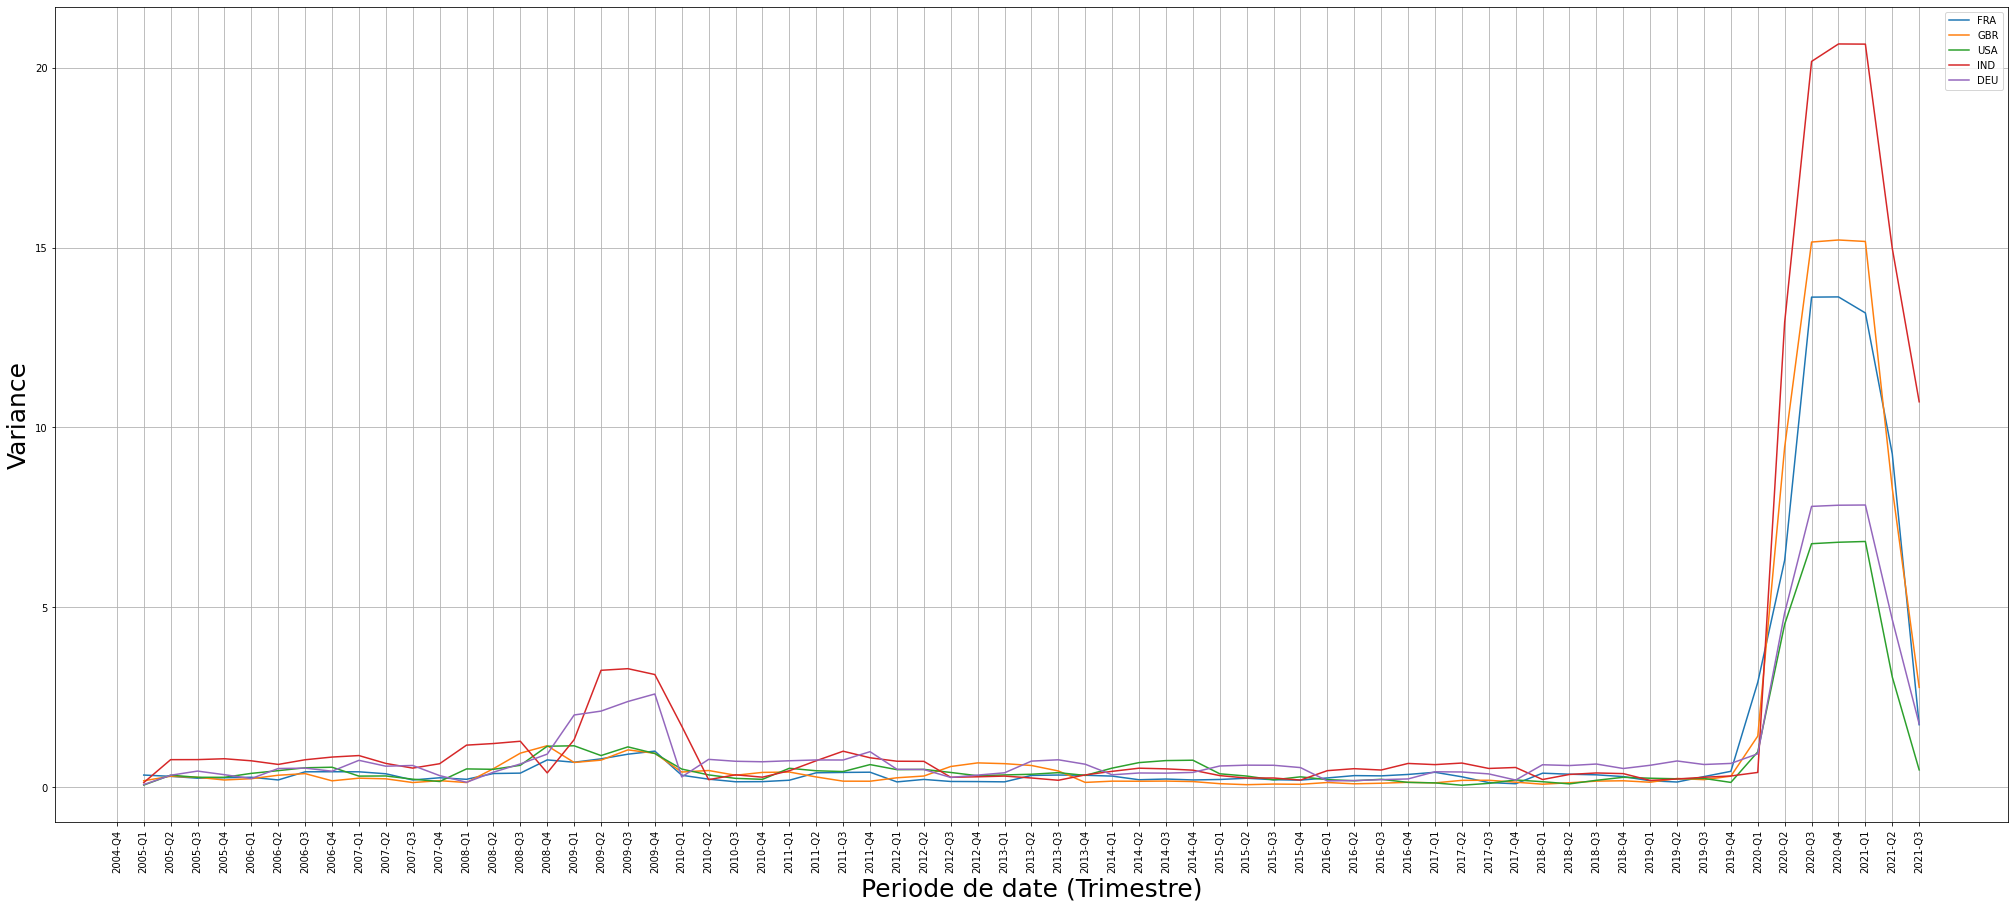

In [ ]:
plt.figure(figsize=(35,15))

for country in countries:      
  data_country = data_countries[country]
  plt.plot(data_country["TIME"], data_country["Variance"], label=country)

plt.xlabel('Periode de date (Trimestre)',fontsize = 25)
plt.xticks(rotation=90)
plt.ylabel('Variance', fontsize = 25)

plt.grid()
plt.legend()
plt.show()

🔰 Notre première théorie est validé, nous pouvons voir deux pics important sur l'ensemble de notre jeu de données : la periode vers 2008/2009, ainsi que la période vers 2021. 

Le COVID-19 ainsi que la crise de 2008 ...

---
###  **5️⃣ Analyse des variations par période spécifique**

🔰 Nous pouvons voir deux pics important, avec un énorme pic pour la pandémie du COVID-19 en 2021.

Dans l'idée ou le pic du COVID-19 écrasse l'ensemble des autres pics de variation, il est important de faire une recherche spécifique.

Pour une meilleure analyse, nous allons découper notre trame de valeur en deux :      

```
1. Du début de la trame à Q1-2018
2. Du Q1-2018 jusqu'a aujourd'hui
```

In [ ]:
date = "2018-Q1"

# create data
before = {}
after = {}

for country in countries:   
  data_country = data_countries[country]
  index = np.where(data_country["TIME"]==date)[0][0]
  before[country] = data_country.iloc[:index].copy()
  after[country] = data_country.iloc[index:].copy()

**1. Première analyse | Du début de la trame à Q1-2018**

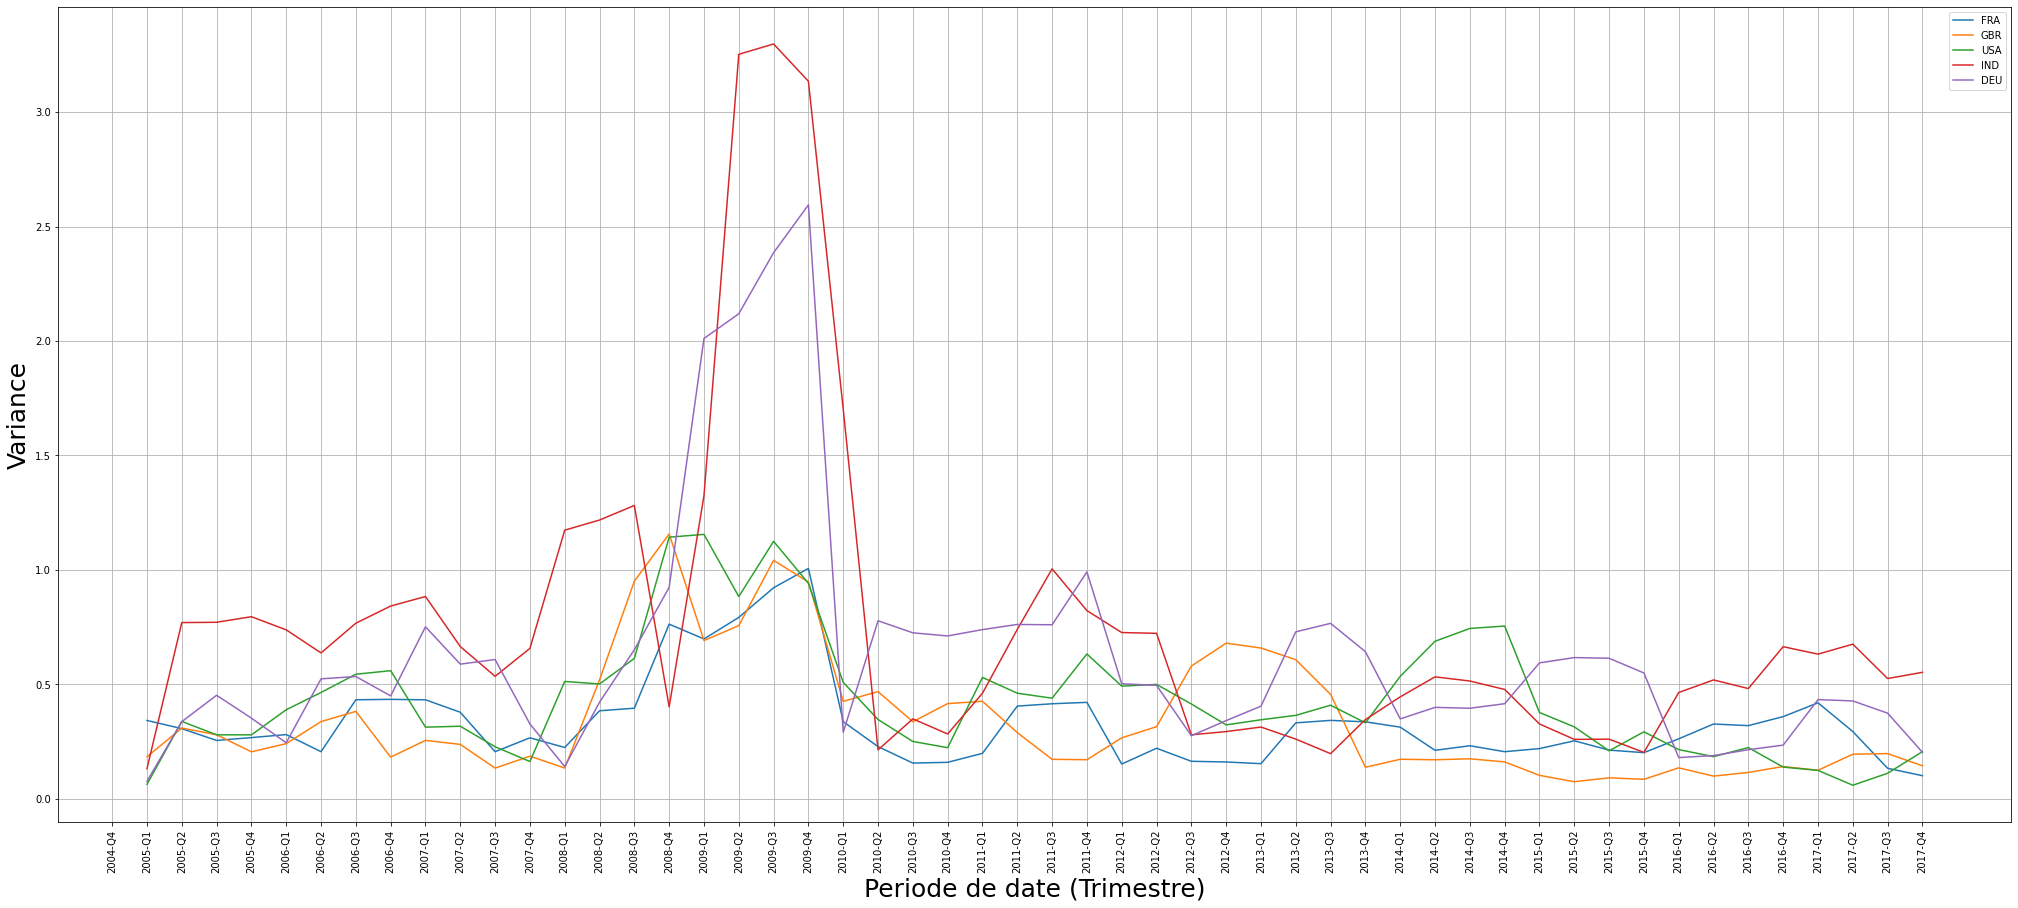

In [ ]:
# before
plt.figure(figsize=(35,15))
for country in countries:   
  data_country = before[country]
  plt.plot(data_country["TIME"], data_country["Variance"], label=country)

plt.xlabel('Periode de date (Trimestre)',fontsize = 25)
plt.xticks(rotation=90)
plt.ylabel('Variance', fontsize = 25)

plt.grid()
plt.legend()
plt.show()

🔰 Avec une plage de valeur sur la période avant COVID-19, nous pouvons voir un pic de valeur important sur la crise de 2008. 

**2. Deuxième analyse | Du début de Q1-2018 jusqu'à la fin de la trame**

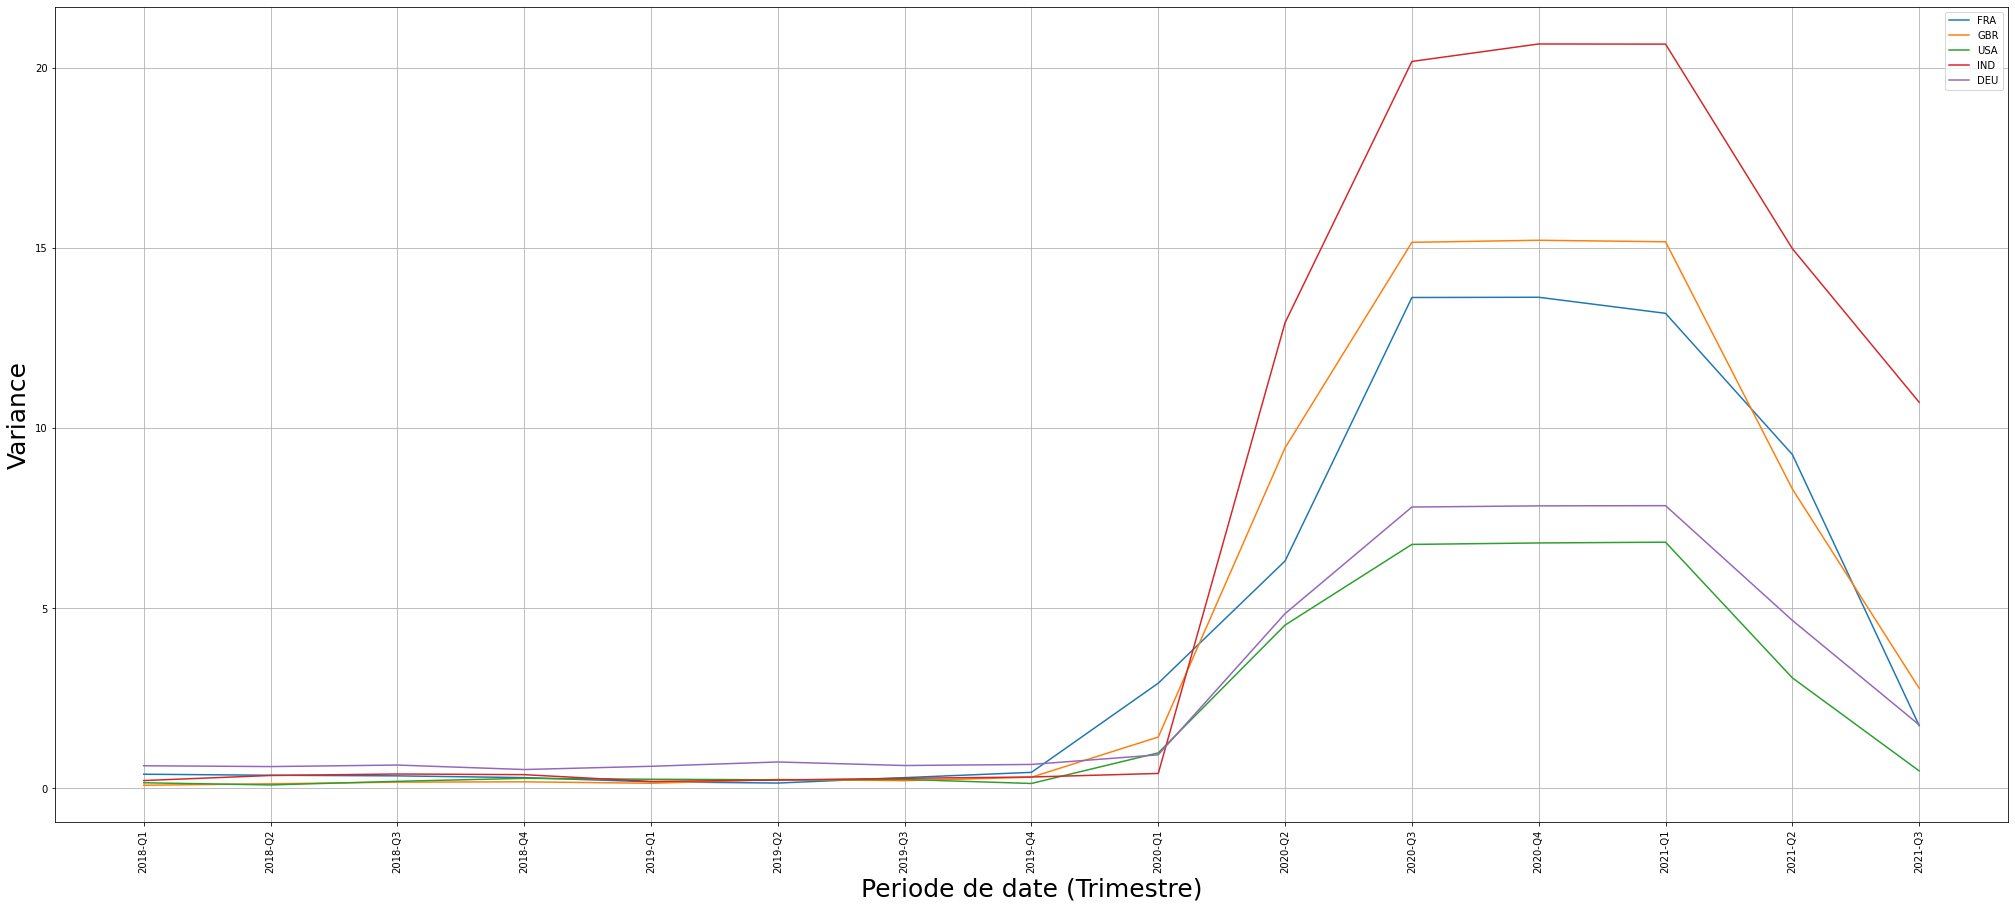

In [ ]:
# after
plt.figure(figsize=(35,15))
for country in countries:  
  data_country = after[country] 
  plt.plot(data_country["TIME"], data_country["Variance"], label=country)

plt.xlabel('Periode de date (Trimestre)',fontsize = 25)
plt.xticks(rotation=90)
plt.ylabel('Variance', fontsize = 25)

plt.grid()
plt.legend()
plt.show()

🔰 Avec maintenant une approche sur la periode pré-covid/pendant-covid, nous pouvons confirmer notre variation extrème. 